## **Proyecto 1:**  Clasificación de datos aplicados.


## **Diabetes.**

### **Librerias y lectura del dataset.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

df1 = pd.read_csv('diabetes.csv')

### **Exploración y preprocesamiento de datasets.**

##### Información general.

In [3]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(df1.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
print("Cantidad de valores unicos.")
print(df1.nunique())

Cantidad de valores unicos.
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


##### Analisis de datos.

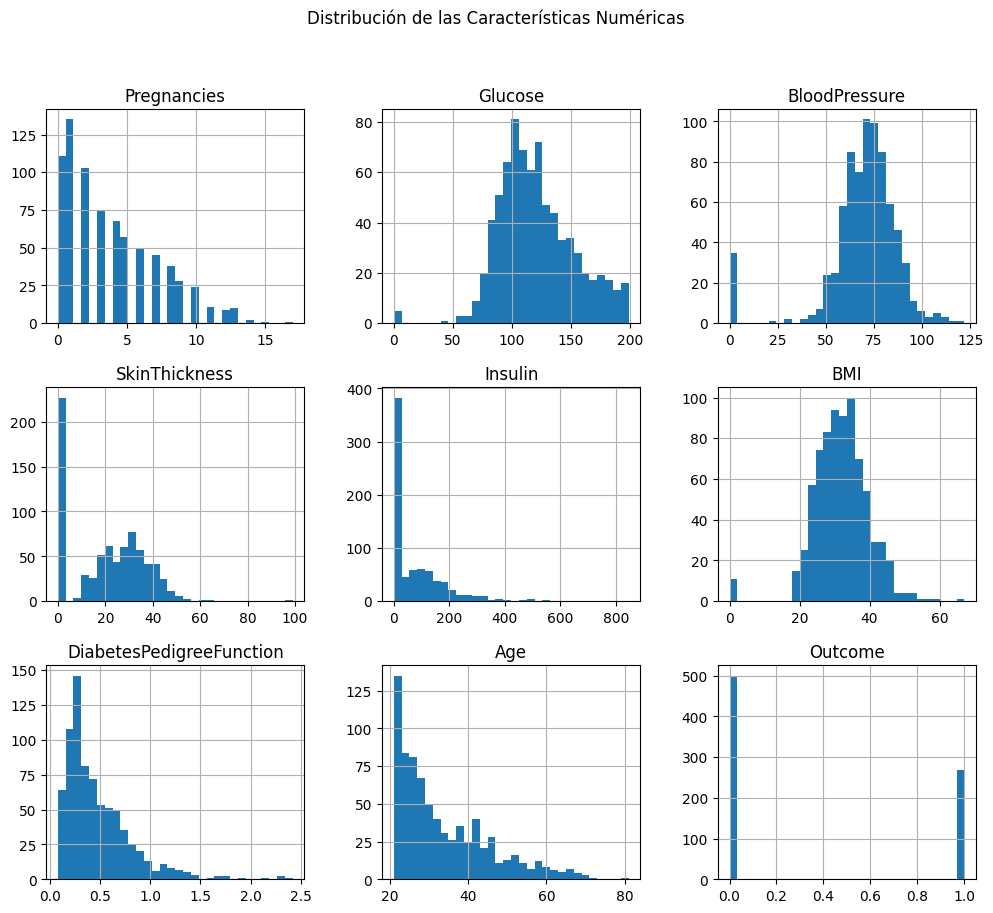

In [6]:
df1.hist(bins=30, figsize=(12, 10))
plt.suptitle('Distribución de las Características Numéricas')
plt.show()

In [7]:
# Ver cuántos ceros hay en las columnas que no deberían tener ceros
df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].apply(lambda x: (x == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

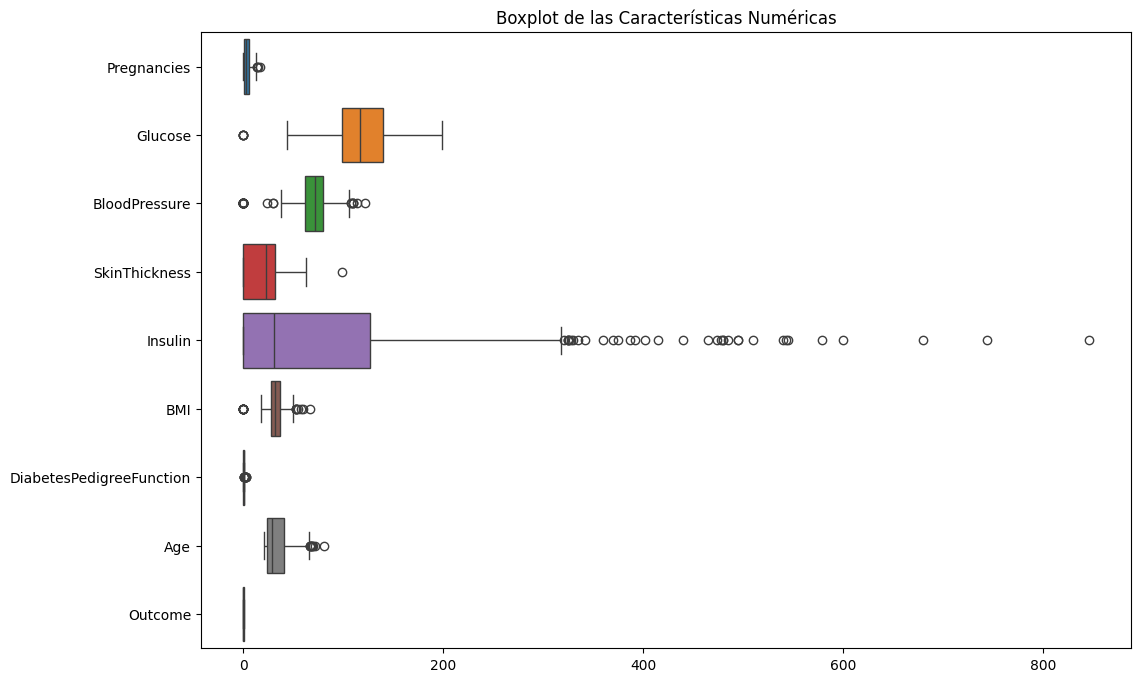

In [8]:
# Boxplot para identificar posibles valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, orient='h')
plt.title('Boxplot de las Características Numéricas')
plt.show()

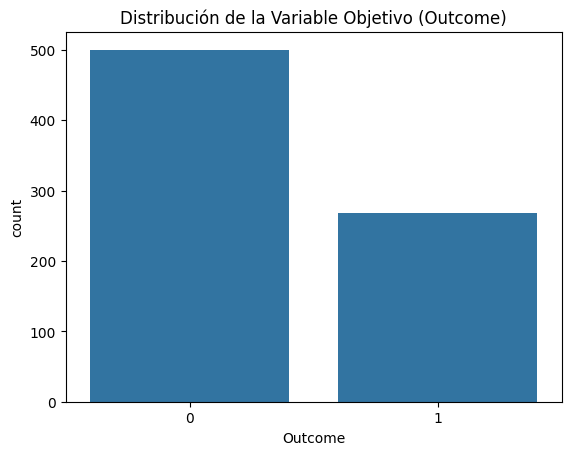

In [9]:
sns.countplot(x='Outcome', data=df1)
plt.title('Distribución de la Variable Objetivo (Outcome)')
plt.show()
#Conteo para ver el numero de pacientes con y sin diabetes.

#### Valores Atípicos.

In [10]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


for column in numeric_columns:
    outliers, lower_bound, upper_bound = identify_outliers(df1, column)
    
    print(f"Análisis de outliers para {column}:\n")
    print(f"Rango normal: {lower_bound:.2f} - {upper_bound:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {(len(outliers) / len(df1)) * 100:.2f}%")
    
    if len(outliers) > 0:
        print("Estadísticas de los outliers:")
        print(outliers[column].describe())
    
    print(f"\n")

Análisis de outliers para Pregnancies:

Rango normal: -6.50 - 13.50
Número de outliers: 4
Porcentaje de outliers: 0.52%
Estadísticas de los outliers:
count     4.000000
mean     15.000000
std       1.414214
min      14.000000
25%      14.000000
50%      14.500000
75%      15.500000
max      17.000000
Name: Pregnancies, dtype: float64


Análisis de outliers para Glucose:

Rango normal: 37.12 - 202.12
Número de outliers: 5
Porcentaje de outliers: 0.65%
Estadísticas de los outliers:
count    5.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Glucose, dtype: float64


Análisis de outliers para BloodPressure:

Rango normal: 35.00 - 107.00
Número de outliers: 45
Porcentaje de outliers: 5.86%
Estadísticas de los outliers:
count     45.000000
mean      19.244444
std       40.792800
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      122.000000
Name: BloodPressure, dtype: float64


Análisis de outliers para S

#### Tratamiento de los datos.

*(Este tratamiento no es necesario para el modelo final ya que se termino utilizando SMOTE.)*

In [11]:
#Tratamiento de balanceo de clases.

class_0 = df1[df1['Outcome'] == 0]
class_1 = df1[df1['Outcome'] == 1]

# Realizar el sobremuestreo (upsampling) de la clase minoritaria
class_1_upsampled = resample(class_1,
                             replace=True,  # con reemplazo para sobremuestrear
                             n_samples=len(class_0),  # igualar el tamaño de la clase mayoritaria
                             random_state=42)

df_balanced = pd.concat([class_0, class_1_upsampled])

#sns.countplot(x='Outcome', data=df_balanced)
#plt.title('Distribución Balanceada de la Variable Objetivo (Outcome)')
#plt.show()

*(El siguiente tratamiento **si** es necesario)*

In [12]:
def tratar_valores_no_validos_y_outliers(df, column, lower_limit, upper_limit, replace_with='median'):
    # Primero, tratamos los valores fuera de los límites biológicamente plausibles
    valid_values = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)][column]
    if replace_with == 'median':
        replacement_value = valid_values.median()
    elif replace_with == 'mean':
        replacement_value = valid_values.mean()
    
    df.loc[df[column] < lower_limit, column] = replacement_value
    df.loc[df[column] > upper_limit, column] = replacement_value
    
    # Luego, tratamos los outliers dentro de los límites biológicos de manera más conservadora
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(lower_limit, Q1 - 1.5 * IQR)
    upper_bound = min(upper_limit, Q3 + 1.5 * IQR)
    
    df[column] = df[column].clip(lower_bound, upper_bound)
    
    return df

In [13]:
limits = {
    'Pregnancies': (0, 10),
    'Glucose': (70, 300),
    'BloodPressure': (40, 200),
    'SkinThickness': (10, 100),
    'Insulin': (10, 1000),
    'BMI': (15, 60),
    'DiabetesPedigreeFunction': (0.05, 2.5),
    'Age': (21, 90)
}

# Aplicar tratamiento para cada columna
for column, (lower, upper) in limits.items():
    df = tratar_valores_no_validos_y_outliers(df1, column, lower, upper)

### **Entrenamiento de modelos.**

#### Selección y balanceo de caracteristicas.

In [14]:
def dataSelec(dataSet, columns):
    # Codificar las columnas categóricas
    categoricalCols = dataSet.select_dtypes(include=['object']).columns.tolist()
    labelEncoder = LabelEncoder()
    
    for col in categoricalCols:
        dataSet[col] = labelEncoder.fit_transform(dataSet[col])
        
    X = dataSet.drop('Outcome', axis=1) 
    y = dataSet['Outcome']  
    
    # Seleccionar las k mejores características
    selector = SelectKBest(chi2, k=columns)
    XNew = selector.fit_transform(X, y)
    selectedFeatures = selector.get_feature_names_out()
    
    # Escalar las características seleccionadas
    scaler = StandardScaler()
    XScaled = scaler.fit_transform(XNew)

    # Balanceo de clases con SMOTE
    smote = SMOTE()
    XBalanced, yBalanced = smote.fit_resample(XScaled, y)
    
    return XBalanced, yBalanced, XScaled, y, selectedFeatures

#### K-Nearest Neighbors (KNN)

In [15]:
def knn(columns, dataSet, neighbors, balanced):
    # Obtener las características balanceadas y sin balancear
    XBalanced, yBalanced, X, y, selectedFeatures = dataSelec(dataSet, columns)

    # Dividir los datos en entrenamiento, validación y prueba
    if balanced:
        X_train, X_temp, y_train, y_temp = train_test_split(XBalanced, yBalanced, test_size=0.30, random_state=42)
    else:
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
        
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # Crear el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=neighbors)

    # Entrenar el modelo
    knn.fit(X_train, y_train)
    
    print("Selected Features:", selectedFeatures)

    # Evaluar el modelo en el conjunto de validación
    y_val_pred = knn.predict(X_val)
    print("\nValidación:")
    print("Accuracy:", accuracy_score(y_val, y_val_pred))
    print("Precision:", precision_score(y_val, y_val_pred))
    print("Recall:", recall_score(y_val, y_val_pred))

    # Evaluar el modelo en el conjunto de prueba
    y_test_pred = knn.predict(X_test)
    print("\nPrueba:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))

    # Mostrar la matriz de confusión
    print("\nMatriz:")
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
    plt.title('Matriz de Confusión KNN')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()

#### Regresión logistica.

In [16]:
def logisticRegression(dataSet, columns, balanced):
    # Obtener las características balanceadas y sin balancear
    XBalanced, yBalanced, X, y, selectedFeatures = dataSelec(dataSet, columns)

    # Dividir los datos en entrenamiento, validación y prueba
    if balanced:
        X_train, X_temp, y_train, y_temp = train_test_split(XBalanced, yBalanced, test_size=0.30, random_state=42)
    else:
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
        
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

    # Crear el modelo de regresión logística
    logistic_regression = LogisticRegression()

    # Entrenar el modelo
    logistic_regression.fit(X_train, y_train)
    
    print("Selected Features:", selectedFeatures)

    # Evaluar el modelo en el conjunto de validación
    y_val_pred = logistic_regression.predict(X_val)
    print("Validación:")
    print("Accuracy:", accuracy_score(y_val, y_val_pred))
    print("Precision:", precision_score(y_val, y_val_pred))
    print("Recall:", recall_score(y_val, y_val_pred))

    # Evaluar el modelo en el conjunto de prueba
    y_test_pred = logistic_regression.predict(X_test)
    print("\nPrueba:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))

    # Mostrar la matriz de confusión
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
    plt.title('Matriz de Confusión Regresión Logística')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()

Selected Features: ['Glucose' 'BMI' 'Age']

Validación:
Accuracy: 0.7
Precision: 0.6753246753246753
Recall: 0.7222222222222222

Prueba:
Accuracy: 0.76
Precision: 0.7721518987341772
Recall: 0.7721518987341772

Matriz:


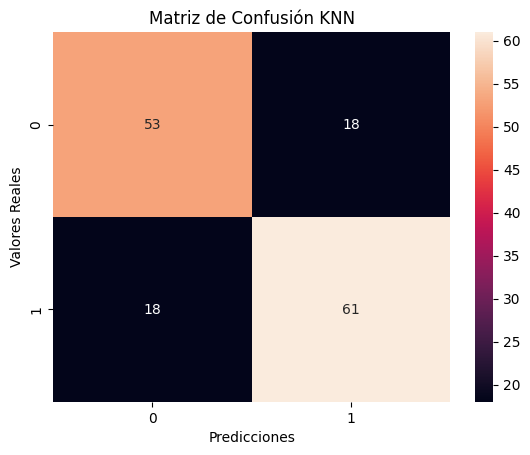

In [31]:
# Ejecutar KNN con balanceo
knn(3, df1, 10, True)

Selected Features: ['Glucose' 'SkinThickness' 'BMI' 'Age']

Validación:
Accuracy: 0.7266666666666667
Precision: 0.6867469879518072
Recall: 0.7916666666666666

Prueba:
Accuracy: 0.74
Precision: 0.7380952380952381
Recall: 0.7848101265822784

Matriz:


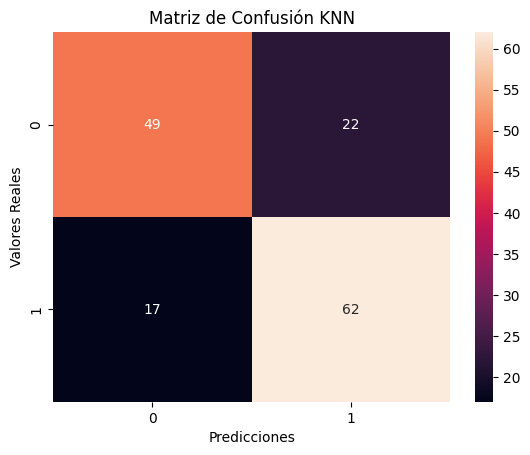

In [32]:
# Ejecutar KNN con balanceo
knn(4, df1, 24, True)

Selected Features: ['Glucose' 'BMI' 'Age']

Validación:
Accuracy: 0.7266666666666667
Precision: 0.691358024691358
Recall: 0.7777777777777778

Prueba:
Accuracy: 0.7133333333333334
Precision: 0.7142857142857143
Recall: 0.759493670886076

Matriz:


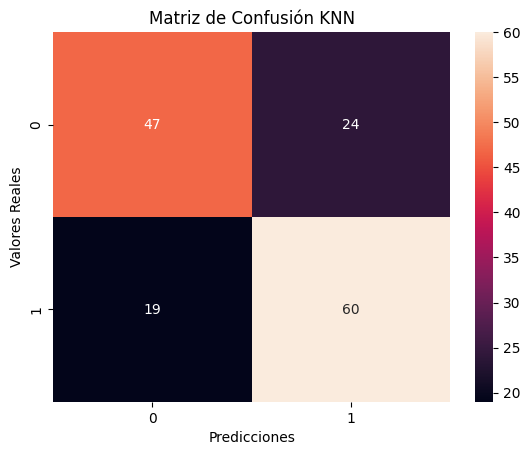

In [48]:
# Ejecutar KNN con balanceo
knn(3, df1, 64, True)

Selected Features: ['Glucose' 'SkinThickness' 'BMI' 'Age']
Validación:
Accuracy: 0.7466666666666667
Precision: 0.7428571428571429
Recall: 0.7222222222222222

Prueba:
Accuracy: 0.74
Precision: 0.7702702702702703
Recall: 0.7215189873417721


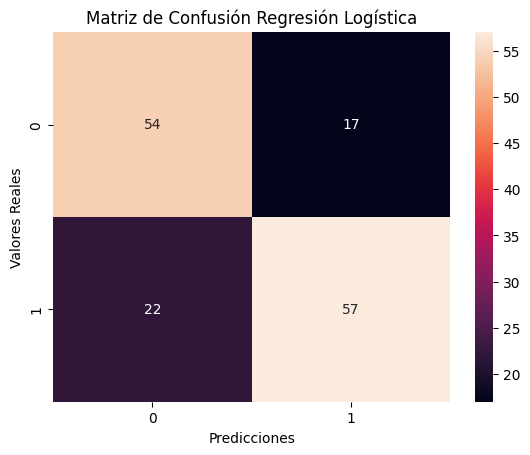

In [28]:
# Ejecutar Regresión Logística con balanceo
logisticRegression(df1, 4, True)

Selected Features: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
Validación:
Accuracy: 0.7333333333333333
Precision: 0.7105263157894737
Recall: 0.75

Prueba:
Accuracy: 0.74
Precision: 0.7941176470588235
Recall: 0.6835443037974683


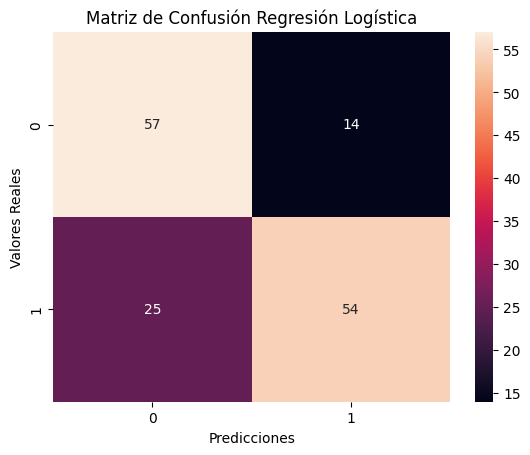

In [57]:
# Ejecutar Regresión Logística con balanceo
logisticRegression(df1, 8, True)